myLiquids1## # This notebook compares the results from Thermobar to those calculated using the spreadsheet hosted on Keith Putirka's personal website
(http://www.fresnostate.edu/csm/ees/faculty-staff/putirka.html)
- Small discrepencies on the order of <1 K are due to inconsistencies in the molar masses in the spreadsheet of Putirka, e.g., for Ol cat proportions, SiO2 mass=60.08, for liquid, 60.0843 etc. 
- For TiO2, was 79.7877, vs. 79.866

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
from functools import partial

In [2]:
out=pt.import_excel('PythonInput_OlLiq_Thermometers_NewBeattie.xlsx', sheet_name="SM Tab4_editedMM")
my_input=out['my_input']
myOls1=out['Ols']
myLiquids1=out['Liqs']

oxide_headers=False
    oxide_headers: bool
        default=False, returns as Ti_Liq_..... =True returns TiO2_Liq_....
        This is used for rapid matrix division for
        pre-processing of data for cation fractions etc

# Adapted olivine-liquid thermometers, where Dmg is calculated from the liquid composition

## equation 22 using calculated DMg from Beattie

In [3]:
Beatt93_HelzCorr=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Put2008_eq22_BeattDMg", 
                                       P=10*my_input['P_GPa'])-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_Put2008_Eq22_NoOl), np.max(my_input.P_Put2008_Eq22_NoOl)), (np.min(my_input.P_Put2008_Eq22_NoOl), np.max(my_input.P_Put2008_Eq22_NoOl)), '-r')
ax1.plot(Beatt93_HelzCorr, my_input.P_Put2008_Eq22_NoOl, 'ok')
ax2.plot(Beatt93_HelzCorr, Beatt93_HelzCorr-my_input.P_Put2008_Eq22_NoOl, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python/Putirka Spreadsheet (°C)')
#ax2.set_ylim([0.995, 1.005])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

KeyError: 'Fet_Liq_cat_frac'

## equation 21 using calculated DMg from Beattie

In [ ]:
Beatt93_HelzCorr=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Put2008_eq21_BeattDMg", P=10*my_input['P_GPa'])-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_Put2008_Eq21_NoOl), np.max(my_input.P_Put2008_Eq21_NoOl)), (np.min(my_input.P_Put2008_Eq21_NoOl), np.max(my_input.P_Put2008_Eq21_NoOl)), '-r')
ax1.plot(Beatt93_HelzCorr, my_input.P_Put2008_Eq21_NoOl, 'ok')
ax2.plot(Beatt93_HelzCorr, Beatt93_HelzCorr-my_input.P_Put2008_Eq21_NoOl, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Liquid-only thermometers

### Testing Putirka Eq 13

In [ ]:
Teq13=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Put2008_eq13")-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Eq13), np.max(my_input.P_S_Eq13)), (np.min(my_input.P_S_Eq13), np.max(my_input.P_S_Eq13)), '-r')
ax1.plot(Teq13, my_input.P_S_Eq13, 'ok')
ax2.plot(Teq13, Teq13-my_input['P_S_Eq13'], 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet')
#ax2.set_ylim([0.995, 1.005])

### Testing Putirka Eq 14
- Discrepencies are because the putirka spreadsheet calculators Liquid Mg# using FeOT, rather than FeO. Does say in instructions that it doesnt matter much (which is very true)
- Here have pasted in a row if Putirka uses Fe2+ instead for Mg# - shown here in red

In [ ]:

Teq14=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Put2008_eq14")-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Eq14), np.max(my_input.P_S_Eq14)), (np.min(my_input.P_S_Eq14), np.max(my_input.P_S_Eq14)), '-r')
ax1.plot(Teq14, my_input.P_S_Eq14, 'ok')



ax2.plot(Teq14, Teq14-my_input.P_S_Eq14, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

### Testing Putirka Eq 15
- Discrepencies are because the putirka spreadsheet calculators Liquid Mg# using FeOT, rather than FeO. Does say in instructions that it doesnt matter much (which is very true)
- Here have pasted in a row if Putirka uses Fe2+ instead for Mg# - shown here in red

In [ ]:
Teq15=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Put2008_eq15", 
                            P=10*my_input['P_GPa'])-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Eq15), np.max(my_input.P_S_Eq15)), (np.min(my_input.P_S_Eq15), np.max(my_input.P_S_Eq15)), '-r')
ax1.plot(Teq15, my_input.P_S_Eq15, 'ok')



ax2.plot(Teq15, Teq15-my_input.P_S_Eq15, 'ok')

ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

### Testing Putirka Eq 16
- Discrepency is because Putirka calculates mole fractoins using FeOT, but cation fractions using FeO(2+). 
- Here, have calculated cation fractions Need to email and work out why these inconsistencies are there/

In [ ]:
Teq16=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Put2008_eq16", P=10*my_input['P_GPa'])-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Eq16), np.max(my_input.P_S_Eq16)), (np.min(my_input.P_S_Eq16), np.max(my_input.P_S_Eq16)), '-r')
ax1.plot(Teq16, my_input.P_S_Eq16, 'ok')
ax2.plot(Teq16, Teq16-my_input.P_S_Eq16, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.9, hspace=None)

### Testing Putirka Helz thornber 1987 MgO

In [ ]:
HT87_Mg=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Helz1987_MgO")-273.16
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_HT87_Mg), np.max(my_input.P_S_HT87_Mg)), (np.min(my_input.P_S_HT87_Mg), np.max(my_input.P_S_HT87_Mg)), '-r')
ax1.plot(HT87_Mg, my_input.P_S_HT87_Mg, 'ok')
ax2.plot(HT87_Mg, HT87_Mg-my_input.P_S_HT87_Mg, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.4, hspace=None)

### Testing Putirka Helz thornber 1987 CaO

In [4]:
HT87_Ca=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Helz1987_CaO")-273.16
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_HT87_Ca), np.max(my_input.P_S_HT87_Ca)), (np.min(my_input.P_S_HT87_Ca), np.max(my_input.P_S_HT87_Ca)), '-r')
ax1.plot(HT87_Ca, my_input.P_S_HT87_Ca, 'ok')
ax2.plot(HT87_Ca, HT87_Ca-my_input.P_S_HT87_Ca, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.4, hspace=None)

KeyError: 'Fet_Liq_cat_frac'

### Testing  Beattie1993

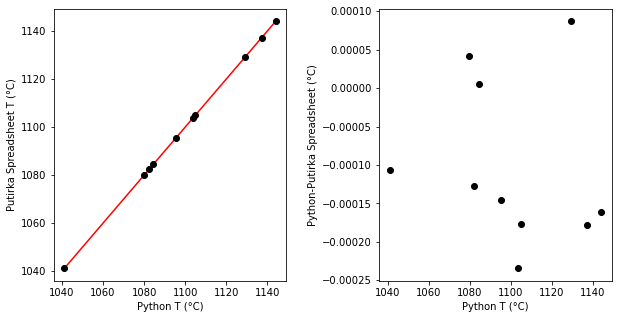

In [11]:
Beatt93=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Beatt93_BeattDMg", 
                              P=10*my_input['P_GPa'])-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Beatt93), np.max(my_input.P_S_Beatt93)), (np.min(my_input.P_S_Beatt93), np.max(my_input.P_S_Beatt93)), '-r')
ax1.plot(Beatt93, my_input.P_S_Beatt93, 'ok')
ax2.plot(Beatt93, Beatt93-my_input.P_S_Beatt93, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.4, hspace=None)

### Testing Beattie 93 Helz correction

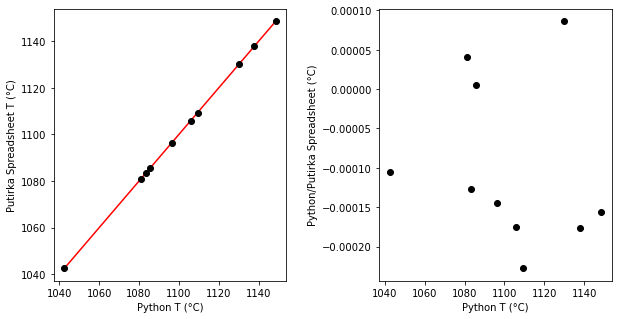

In [12]:
Beatt93_HelzCorr=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Beatt93_BeattDMg_HerzCorr",
                                       P=10*my_input['P_GPa'])-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Beatt93_HelzCorr), np.max(my_input.P_S_Beatt93_HelzCorr)), (np.min(my_input.P_S_Beatt93_HelzCorr), np.max(my_input.P_S_Beatt93_HelzCorr)), '-r')
ax1.plot(Beatt93_HelzCorr, my_input.P_S_Beatt93_HelzCorr, 'ok')
ax2.plot(Beatt93_HelzCorr, Beatt93_HelzCorr-my_input.P_S_Beatt93_HelzCorr, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python/Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.4, hspace=None)

## Putirka 2008 equation 19 using Kd ol-liq from Beattie (combination of equation 19 and 20 from the 2008 paper)

- Discrepencies likely molar masses, which are a little different within this # of decimal places

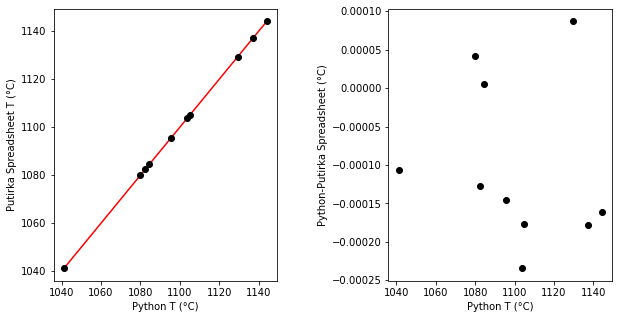

In [13]:
Beatteq19_HelzCorr=pt.calculate_liq_only_temp(liq_comps=myLiquids1, 
                                       equationT="T_Put2008_eq19_BeattDMg", P=10*my_input['P_GPa'])-273.15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_Put2008_Eq19_NoOl), np.max(my_input.P_Put2008_Eq19_NoOl)), (np.min(my_input.P_Put2008_Eq19_NoOl), np.max(my_input.P_Put2008_Eq19_NoOl)), '-r')
ax1.plot(Beatteq19_HelzCorr, my_input.P_Put2008_Eq19_NoOl, 'ok')
ax2.plot(Beatteq19_HelzCorr, Beatteq19_HelzCorr-my_input.P_Put2008_Eq19_NoOl, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Sugawara liquid-only thermometers - Can't find a tool, but show that they give reasonably similar results to T_Put2008_eq14

## Equation 1
- No direct comparison, but for equation 1, can pretty much recreate their figure 3 for these liquids, red line is taken from their plot (hard to be more precise due to thick line width)
- Their figure also shows helz and thornber offset to lower Temp, which this comparison shows too

Text(0, 0.5, 'MgO in Liquid (mol%)')

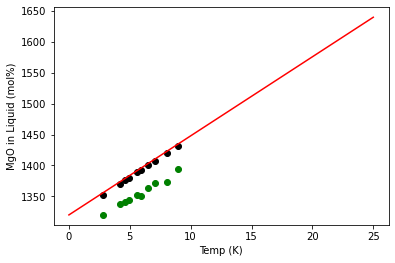

In [14]:
a=pt.calculate_anhydrous_cat_fractions_liquid(liq_comps=myLiquids1)

T_py_Seq1=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq1")#-273.15
T_py_HT=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Helz1987_MgO")
plt.plot(100*a.MgO_Liq_mol_frac, T_py_Seq1, 'ok')
plt.plot(100*a.MgO_Liq_mol_frac, T_py_HT, 'og')

# Line taking from Figure in paper, very thick line so hard to tell. Shows helz and thornber offset to lower temps, as see here 
plt.plot([0, 25], [1320, 1640], '-r')
plt.xlabel('Temp (K)')
plt.ylabel('MgO in Liquid (mol%)')

## For equation 3, compare to equation 1

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


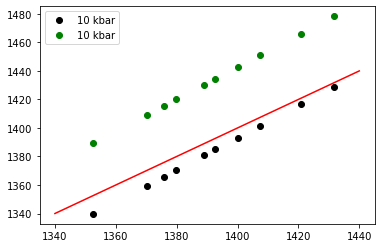

In [17]:
## Offset on their figure 5, is 30-50K at 1 Gpa, which pretty much matches this here. 
T_py_Seq1=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq1")#-273.15
T_py_Seq3_ol_1kbar=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq3_ol", P=1)#-273.15
T_py_Seq3_ol_10kbar=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq3_ol", P=10)#-273.15

plt.plot(T_py_Seq1, T_py_Seq3_ol_1kbar, 'ok', label="10 kbar")
plt.plot(T_py_Seq1, T_py_Seq3_ol_10kbar, 'og', label="10 kbar")
plt.plot([1340, 1440], [1340, 1440], '-r')
plt.legend()

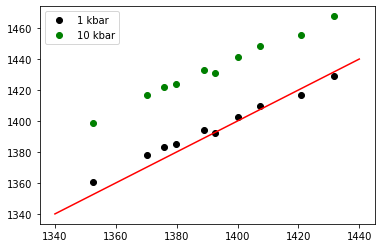

In [15]:
T_py_Seq1=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq1")#-273.15
T_py_Seq6_cpx_1kbar=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq6a", P=1)#-273.15
T_py_Seq6_cpx_10kbar=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq6a", P=10)#-273.15

plt.plot(T_py_Seq1, T_py_Seq6_cpx_1kbar, 'ok', label="1 kbar")
plt.plot(T_py_Seq1, T_py_Seq6_cpx_10kbar, 'og', label="10 kbar")
plt.plot([1340, 1440], [1340, 1440], '-r')
plt.legend()

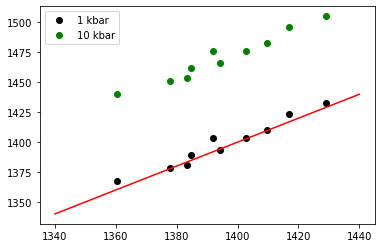

In [16]:
T_py_Seq6a=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq6a", P=1)#-273.15
T_py_Seq6_cpx_1kbar=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq6b", P=1)#-273.15
T_py_Seq6_cpx_10kbar=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq6b", P=10)#-273.15

plt.plot(T_py_Seq6a, T_py_Seq6_cpx_1kbar, 'ok', label="1 kbar")
plt.plot(T_py_Seq6a, T_py_Seq6_cpx_10kbar, 'og', label="10 kbar")
plt.plot([1340, 1440], [1340, 1440], '-r')
plt.legend()

# Olivine- Liquid thermometers

## Testing Beattie (1993)

In [17]:
out=pt.import_excel('PythonInput_OlLiq_Thermometers_NewBeattie.xlsx', sheet_name="SM Tab4")
my_input=out['my_input']
myOls1=out['Ols']
myLiquids1=out['Liqs']

In [18]:
T_Put=my_input['P_S_Beatt93_UsingOlivine'] 
T_pyf=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  equationT="T_Beatt93_ol", P=10*my_input['P_GPa'])-273.15
T_py=T_pyf['T_K_calc']
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

TypeError: calculate_ol_liq_temp() got an unexpected keyword argument 'Ol_Comps'

## Testing Beattie 1993 with Herzberg correction

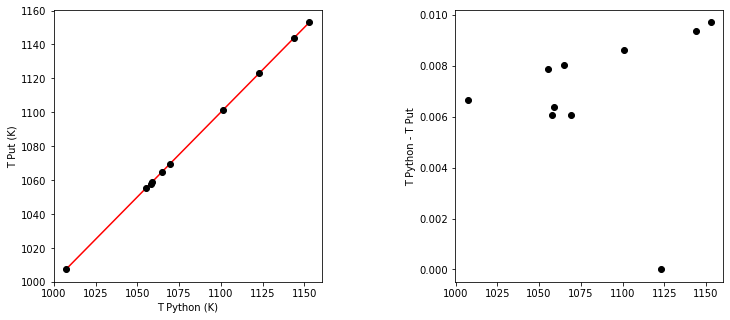

In [21]:
T_Put=my_input['P_S_Beatt93_UsingOlivine_HerzCorr'] 
T_pyf=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  equationT="T_Beatt93_ol_HerzCorr", 
                               P=10*my_input['P_GPa'])
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
T_py=T_pyf['T_K_calc']-273.15
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Testing Equation 22

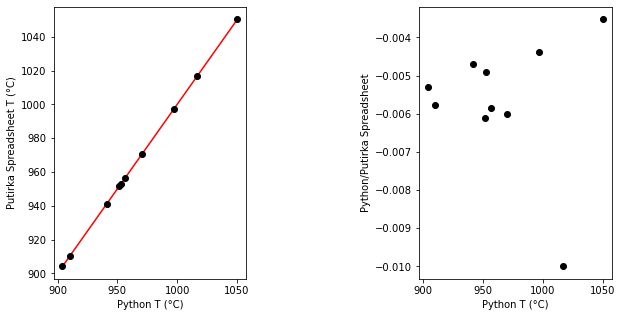

In [22]:
Teq22y=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                               equationT="T_Put2008_eq22", P=10*my_input['P_GPa'])-273.16
Teq22=Teq22y['T_K_calc']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Eq22), np.max(my_input.P_S_Eq22)), (np.min(my_input.P_S_Eq22), np.max(my_input.P_S_Eq22)), '-r')
ax1.plot(Teq22, my_input.P_S_Eq22, 'ok')
ax2.plot(Teq22, Teq22-my_input.P_S_Eq22, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python/Putirka Spreadsheet')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.9, hspace=None)

### Testing Equation 21

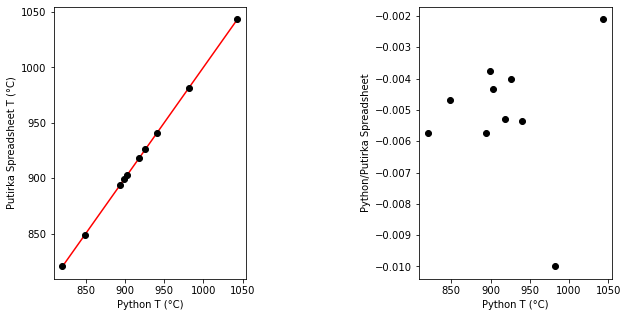

In [23]:
Teq21y=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  equationT="T_Put2008_eq21", 
                               P=10*my_input['P_GPa'])-273.16
Teq21=Teq21y['T_K_calc']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_Eq21), np.max(my_input.P_S_Eq21)), (np.min(my_input.P_S_Eq21), np.max(my_input.P_S_Eq21)), '-r')
ax1.plot(Teq21, my_input.P_S_Eq21, 'ok')
ax2.plot(Teq21, Teq21-my_input.P_S_Eq21, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python/Putirka Spreadsheet')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.9, hspace=None)

## Testing Sisson and Grove

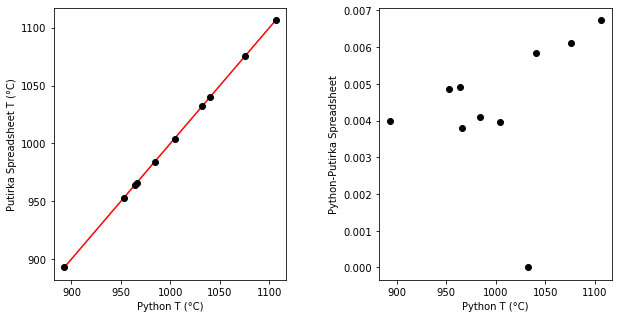

In [24]:
TSG_1992y=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                  equationT="T_Sisson1992", P=10*my_input['P_GPa'])-273.15
TSG_1992=TSG_1992y['T_K_calc']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input.P_S_SissonGrove1992), np.max(my_input.P_S_SissonGrove1992)), (np.min(my_input.P_S_SissonGrove1992), np.max(my_input.P_S_SissonGrove1992)), '-r')
ax1.plot(TSG_1992, my_input.P_S_SissonGrove1992, 'ok')
ax2.plot(TSG_1992, TSG_1992-my_input.P_S_SissonGrove1992, 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python-Putirka Spreadsheet')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.4, hspace=None)

## Ni thermometer of Pu et al. 2017

In [25]:
out=pt.import_excel('PythonInput_OlLiq_Thermometers_NewBeattie.xlsx', sheet_name="Pu2017_2021_NiThermometers")
my_input=out['my_input']
myOls2=out['Ols']
myLiquids2=out['Liqs']

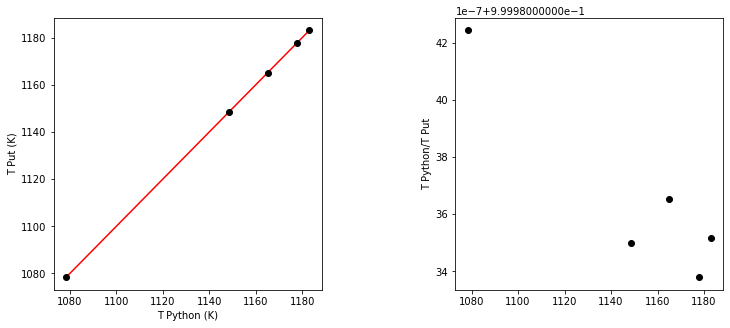

In [28]:
T_pyy=pt.calculate_ol_liq_temp(liq_comps=myLiquids2, ol_comps=myOls2, equationT="T_Pu2017")-273.15
T_py=T_pyy['T_K_calc']
T_Put=my_input['Temp_2017Calculator'] 
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py/T_Put, 'ok')
ax2.set_ylabel('T Python/T Put')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)